<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data-Analysis-And-Machine-Learning-Projects/blob/master/7.%20Sentiment%20Analysis/News%20Classification%20RandomForest-NLP/News_Classfication_NLP_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [16]:
import pandas as pd
import numpy as np
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Loading Data

In [17]:
PATH = "/content/bbc-text.csv"
df = pd.read_csv(PATH) # Loading dataframe
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


# Check Data

<ipython-input-18-fe0a14e27e25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="category", data=df, palette='viridis')


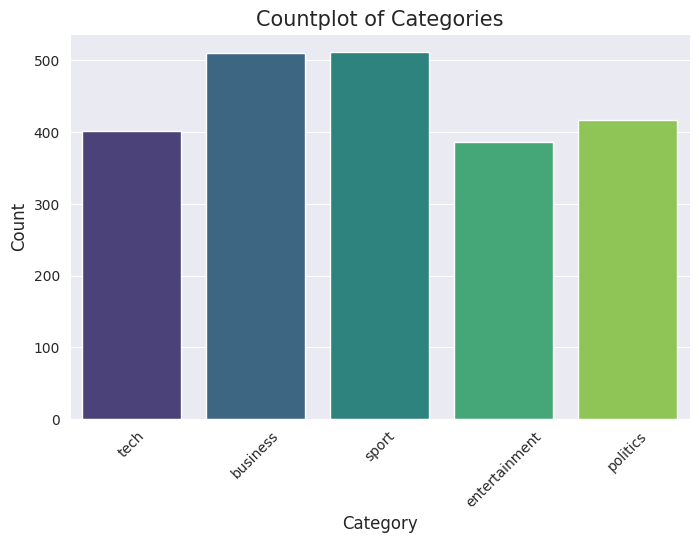

In [18]:
plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
sns.countplot(x="category", data=df, palette='viridis')
plt.title("Countplot of Categories", fontsize=15)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Text Preprocessing

In [22]:
# Download NLTK
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Define variables
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Define a preprocessing method
def preprocess_text(text):
    text = text.lower() # to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation)) # remove punctuation
    tokens = word_tokenize(text) # tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] # lemmatization
    return " ".join(tokens)

df['preprocessed_text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
df[['text', 'preprocessed_text']].head(10)

,text,preprocessed_text
0,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...
5,howard hits back at mongrel jibe michael howar...,howard hit back mongrel jibe michael howard sa...
6,blair prepares to name poll date tony blair is...,blair prepares name poll date tony blair likel...
7,henman hopes ended in dubai third seed tim hen...,henman hope ended dubai third seed tim henman ...
8,wilkinson fit to face edinburgh england captai...,wilkinson fit face edinburgh england captain j...
9,last star wars not for children the sixth an...,last star war child sixth final star war movie...


# WordCloud

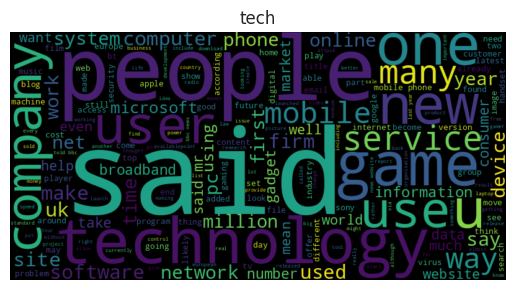

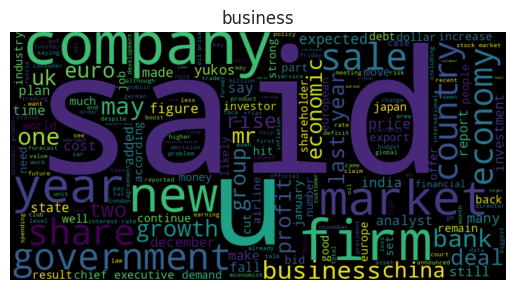

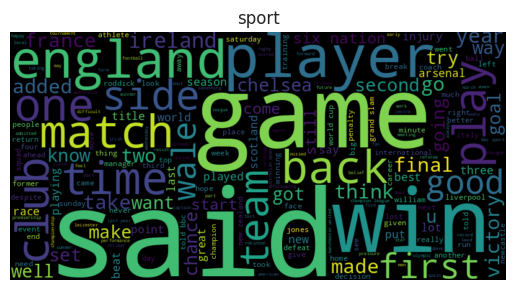

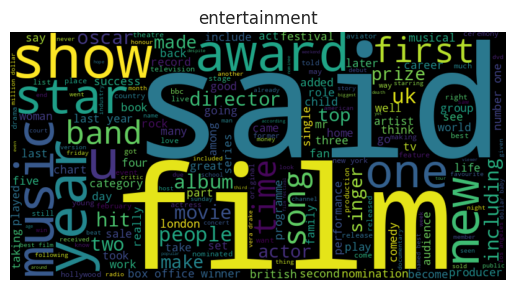

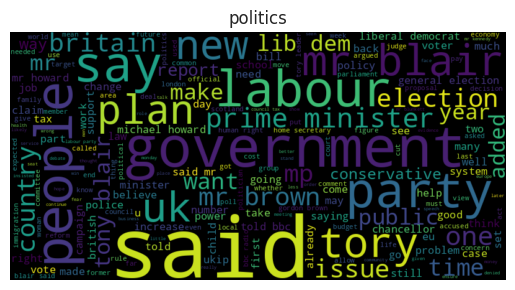

In [27]:
from wordcloud import WordCloud

for cat in df['category'].unique():
    text = " ".join(df[df['category'] == cat]['preprocessed_text'])
    wordcloud = WordCloud(width=800,
                          height=400,
                          background_color='black').generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(cat)
    plt.show()

# Word Frequencies

<ipython-input-28-838728f6e99d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= common_df,


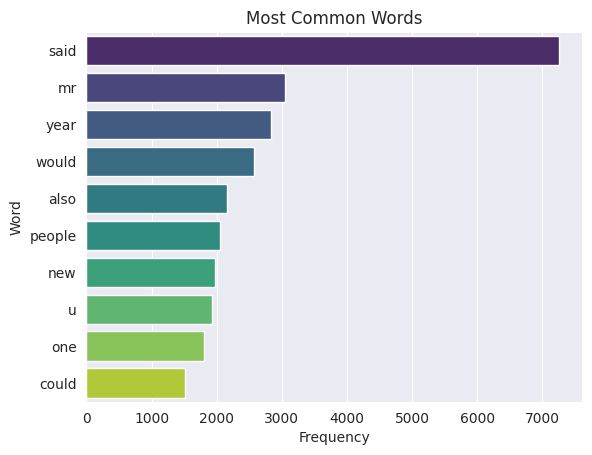

In [28]:
# Record all words
all_words =[word for text in df['preprocessed_text'] for word in text.split()]
# Calculate frequencies
word_freq = Counter(all_words)
# Most commons
most_common_words = word_freq.most_common(10)
common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
#plot
sns.barplot(data= common_df,
            x="Frequency",
            y='Word',
            palette='viridis')
plt.title("Most Common Words")
plt.show()

# Define Model

## Vectorization TF-IDF

In [29]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['preprocessed_text'])
tfidf_matrix.shape # num_doc, num_feature

(2225, 29599)

## Label Encoding

In [30]:
encoder = LabelEncoder()
df['category_encoded'] = encoder.fit_transform(df['category'])
df[['category', 'category_encoded']].drop_duplicates().sort_values('category_encoded')

,category,category_encoded
1,business,0
4,entertainment,1
5,politics,2
2,sport,3
0,tech,4


In [32]:
X = tfidf_matrix
y = df['category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1780, 29599)
X_test shape: (445, 29599)
y_train shape: (1780,)
y_test shape: (445,)


## RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# predict on the test data
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       101
           1       1.00      0.93      0.96        81
           2       0.95      0.95      0.95        83
           3       0.95      0.99      0.97        98
           4       0.96      0.93      0.94        82

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



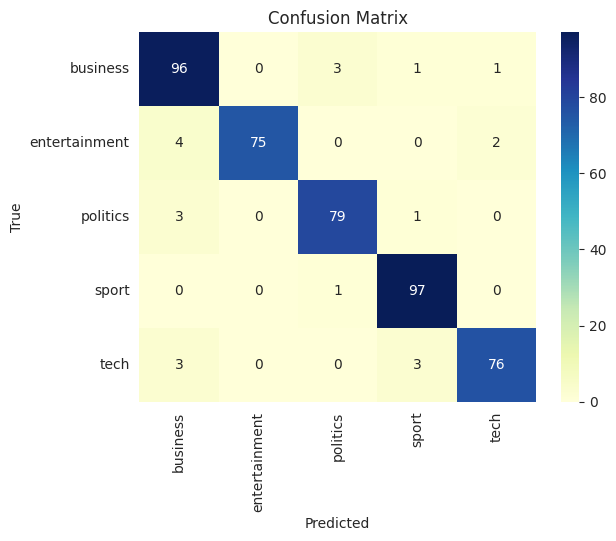

In [39]:
# Confusion matrix to visualize model performance
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
